# y -> Whether the client has subscribed a term deposit or not

In [2]:
# IMPORTING LIBRARIES
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [6]:
# IMPORTING DATASET
bank=pd.read_csv("bank-full.csv",sep=";")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
# SHAPE OF DATA
bank.shape

(45211, 17)

In [12]:
# DETECTING NA VALUES
bank.dropna()
bank.shape

(45211, 17)

In [14]:
# DETECTING DUPLICATE VALUES
bank[bank.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [15]:
#converting categorical data into numerical
bank.replace({"job":{"blue-collar":0,"management":1,"technician":2,"admin.":3,"services":4,"retired":5,"self-employed":6,"entrepreneur":7,"unemployed":8,"housemaid":9,"student":10,"unknown":11 }},inplace=True)
bank.replace({"marital":{"married":0,"single":1,"divorced":2}},inplace=True)
bank.replace({"education":{"unknown":0,"primary":1,"secondary":2,"tertiary":3}},inplace=True)
bank.replace({"default":{"no":0,"yes":1}},inplace=True)
bank.replace({"housing":{"no":0,"yes":1}},inplace=True)
bank.replace({"loan":{"no":0,"yes":1}},inplace=True)
bank.replace({"y":{"no":0,"yes":1}},inplace=True)
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,1,0,3,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,2,1,2,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,7,0,2,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,0,0,0,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,11,1,0,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2,0,3,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,5,2,1,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,5,0,2,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,0,0,2,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [18]:
# THERE ARE STILL CATEGORICAL COLUMNS. SO WE WILL USE ONE HOT ENCODING TO SOLVE THIS PROBLEM
bank=pd.get_dummies(bank,columns=['contact','poutcome','month'])
pd.set_option("display.max.columns", None)

In [19]:
bank

,age,job,marital,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,1,0,3,0,2143,1,0,5,261,1,-1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,2,1,2,0,29,1,0,5,151,1,-1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,7,0,2,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,0,0,0,0,1506,1,0,5,92,1,-1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,11,1,0,0,1,0,0,5,198,1,-1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2,0,3,0,825,0,0,17,977,3,-1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,5,2,1,0,1729,0,0,17,456,2,-1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,5,0,2,0,5715,0,0,17,1127,5,184,3,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,0,0,2,0,668,0,0,17,508,4,-1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
# DIVIDING DATA INTO INPUT OUTPUT VARIABLES
x = bank.drop(['y'],axis=1)
y = bank["y"]

In [24]:
#LOGISTIC REGRESSION AND FIT THE MODEL
model = LogisticRegression()
model.fit(x,y)

C:\Users\haari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
#PREDICT FOR x DATASET
y_pred = model.predict(x)

In [30]:
df=pd.DataFrame({'actual':y,'predicted':model.predict(x)})
df

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,1
45209,0,0


In [31]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix)

[[39261   661]
 [ 4374   915]]


In [32]:
#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.58      0.17      0.27      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.58      0.60     45211
weighted avg       0.86      0.89      0.86     45211



Text(0, 0.5, 'True Positive Rate')

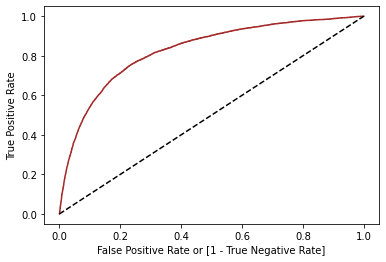

In [35]:
# ROC CURVE
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, model.predict_proba (x)[:,1])

auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='brown', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [36]:
print(auc)

0.578221640252946
